# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [3]:
#1
url = "https://raw.githubusercontent.com/valentraphael/Data-Mining/refs/heads/main/penguins_size.csv"
data = pd.read_csv(url)

data.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
15,Adelie,Torgersen,36.6,17.8,185.0,3700.0,FEMALE
299,Gentoo,Biscoe,45.2,16.4,223.0,5950.0,MALE
65,Adelie,Biscoe,41.6,18.0,192.0,3950.0,MALE
53,Adelie,Biscoe,42.0,19.5,200.0,4050.0,MALE
46,Adelie,Dream,41.1,19.0,182.0,3425.0,MALE
265,Gentoo,Biscoe,43.6,13.9,217.0,4900.0,FEMALE
209,Chinstrap,Dream,49.3,19.9,203.0,4050.0,MALE
271,Gentoo,Biscoe,48.5,14.1,220.0,5300.0,MALE
66,Adelie,Biscoe,35.5,16.2,195.0,3350.0,FEMALE
257,Gentoo,Biscoe,44.4,17.3,219.0,5250.0,MALE


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [4]:
#2
data.info()

#This DataFrame contains information on 344 penguins, with seven columns detailing species, island, culmen length,
#culmen depth, flipper length, body mass, and sex. Most columns are fully populated, but there are a few missing values,
#particularly in the culmen length, culmen depth, flipper length, body mass, and sex columns. The columns related to physical measurements
#(culmen length, culmen depth, flipper length, and body mass) are numerical, while species, island, and sex are categorical.
#The presence of missing data, especially in the "sex" column, may require attention for accurate analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [5]:
#3
data.describe()
#The summary statistics of the four numeric variables—culmen length, culmen depth, flipper length, and body mass—reveal notable variability in the penguin dataset.
#The culmen length ranges from 32.1 to 59.6 mm, with a mean of 43.92 mm and a standard deviation of 5.46 mm, showing moderate spread around the mean.
#Similarly, culmen depth varies between 13.1 and 21.5 mm, with less variation (mean: 17.15 mm, std: 1.97 mm). Flipper length ranges from 172 to 231 mm, with a mean of 200.91 mm,
#indicating broader variability (std: 14.06 mm). Body mass has the widest range, spanning from 2700 g to 6300 g, with an average of 4201.75 g, and the highest variability (std: 801.95 g).
#These statistics suggest that the penguins exhibit considerable diversity in their physical characteristics, with body mass showing the greatest variation.

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [12]:
#4
speciescount = data['species'].value_counts()
islandcount = data['island'].value_counts()
sexcount = data['sex'].value_counts()

speciescount, islandcount, sexcount

(species
 Adelie       152
 Gentoo       124
 Chinstrap     68
 Name: count, dtype: int64,
 island
 Biscoe       168
 Dream        124
 Torgersen     52
 Name: count, dtype: int64,
 sex
 MALE      168
 FEMALE    165
 .           1
 Name: count, dtype: int64)

5. Null handling

In [13]:
#5
data.isnull().sum()

,0
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,10


6. Create your own insightful visualization and explain it in at least 2 sentences

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

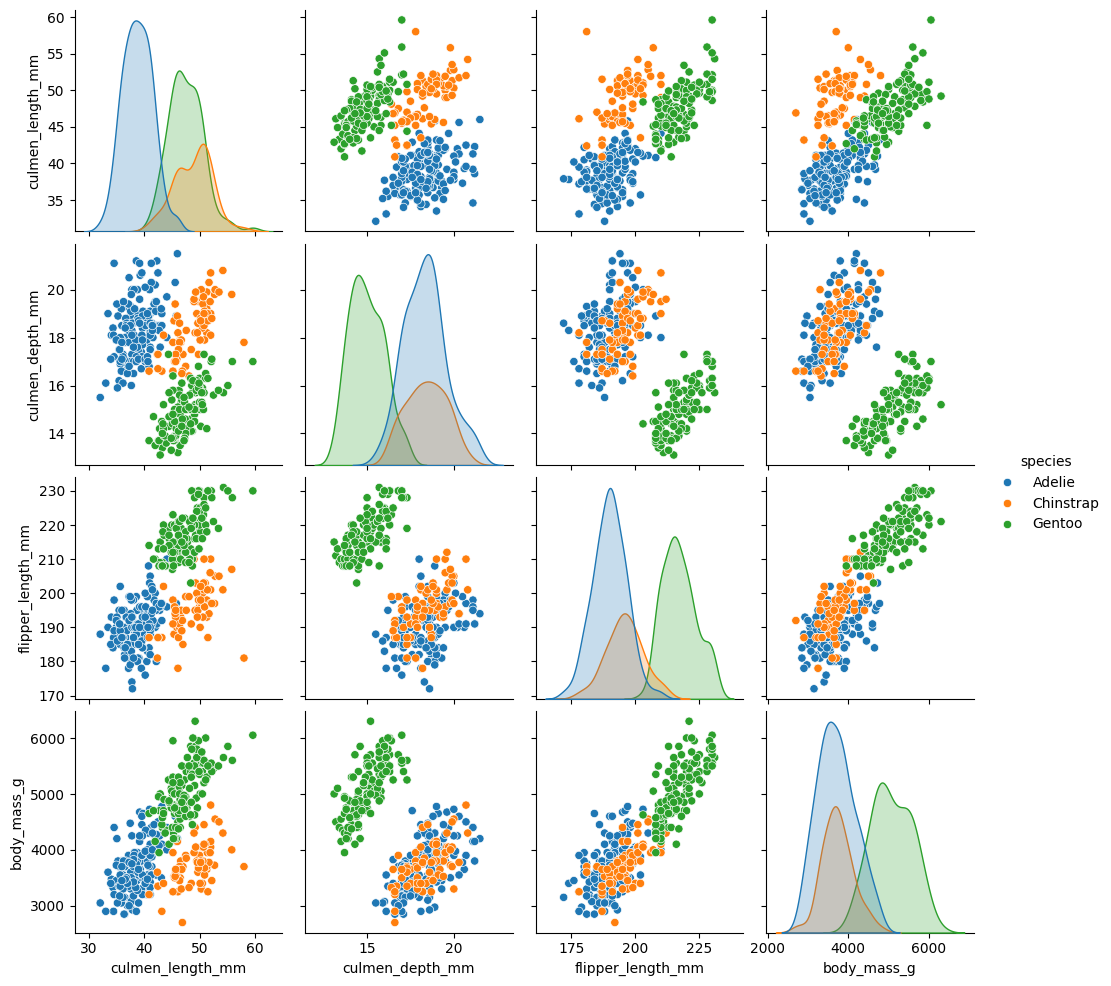

In [14]:
#6
sns.pairplot(data, hue='species')
plt.show()

#The visualization is a pair plot that explores the relationships between different physical attributes
#(culmen length, culmen depth, flipper length, and body mass) of three penguin species (Adelie, Chinstrap, and Gentoo).
#Each subplot represents a combination of two attributes, with a scatter plot showing their joint distribution and marginal histograms on the diagonal.
#The colors of the points correspond to the penguin species, revealing distinct patterns in the data. For example, Adelie penguins tend to have smaller culmen lengths and depths,
#while Gentoo penguins have longer flippers and larger body masses. This visualization helps to understand the differences and similarities between the species based on their physical
#characteristics.


7. Check unique value of our target variable

In [16]:
#7
print(data['species'].unique())

['Adelie' 'Chinstrap' 'Gentoo']


8. encode categorical columns and display the results

In [19]:
#8
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])
data['island'] = label_encoder.fit_transform(data['island'])
data['sex'] = label_encoder.fit_transform(data['sex'])

data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
3,0,2,NaN,NaN,NaN,NaN,3
4,0,2,36.7,19.3,193.0,3450.0,1
...,...,...,...,...,...,...,...
339,2,0,NaN,NaN,NaN,NaN,3
340,2,0,46.8,14.3,215.0,4850.0,1
341,2,0,50.4,15.7,222.0,5750.0,2
342,2,0,45.2,14.8,212.0,5200.0,1


9. encode the target column and display the results

In [21]:
#9
data['species'] = label_encoder.fit_transform(data['species'])
data.sample(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
335,2,0,55.1,16.0,230.0,5850.0,2
7,0,2,39.2,19.6,195.0,4675.0,2
19,0,2,46.0,21.5,194.0,4200.0,2
239,2,0,48.7,15.1,222.0,5350.0,2
41,0,1,40.8,18.4,195.0,3900.0,2


10. create a heatmap to see the correlation and explain the conclusion

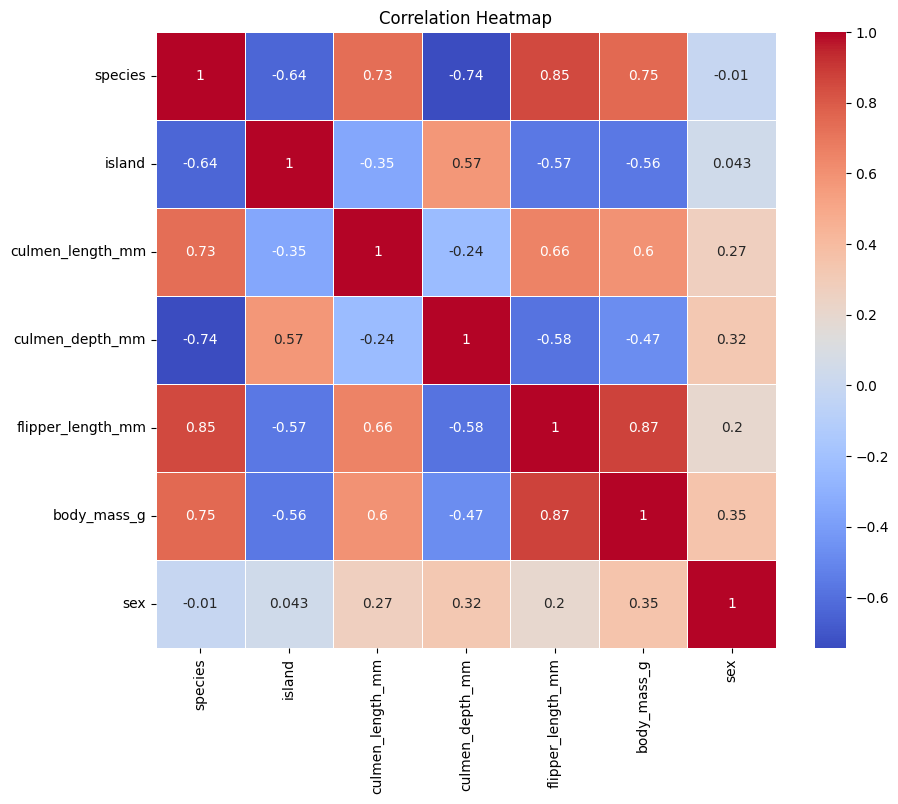

In [22]:
#10
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Machine Learning

1. Splitting X and y

In [23]:
#1
X = data.drop('species', axis=1)
y = data['species']

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [24]:
#2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((275, 6), (69, 6))

In [25]:
#3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((275, 6), (69, 6))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [26]:
#Criterion Entropy
#a
model_entropy = DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [27]:
#b
y_pred_entropy = model_entropy.predict(X_test)

In [28]:
#c
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
accuracy_entropy

0.9710144927536232

In [34]:
#d
testcore = accuracy_entropy
traincore = model_entropy.score(X_train, y_train)
print(f"Test Score: {testcore:.4f}")
print(f"Train Score: {traincore:.4f}")

Test Score: 0.9710
Train Score: 0.9964


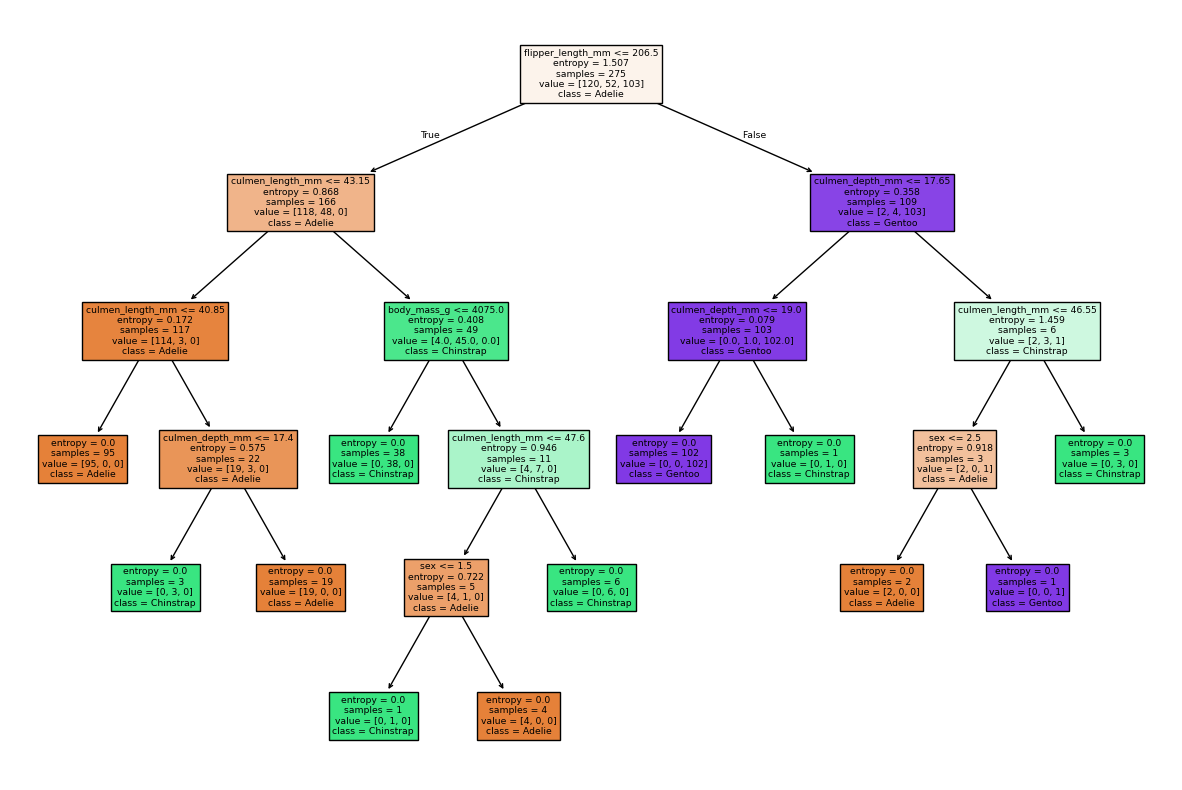

In [35]:
#e
plt.figure(figsize=(15, 10))
tree.plot_tree(model_entropy, filled=True, feature_names=X.columns, class_names=['Adelie', 'Chinstrap', 'Gentoo'])
plt.show()

2. Criterion Gini index

In [36]:
#a
model_gini = DecisionTreeClassifier(criterion='gini')
model_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
#b
y_pred_gini = model_gini.predict(X_test)

In [38]:
#c
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_gini

0.9710144927536232

In [39]:
#d
testcore = accuracy_gini
traincore = model_gini.score(X_train, y_train)
print(f"Test Score: {testcore:.4f}")
print(f"Train Score: {traincore:.4f}")

Test Score: 0.9710
Train Score: 0.9964


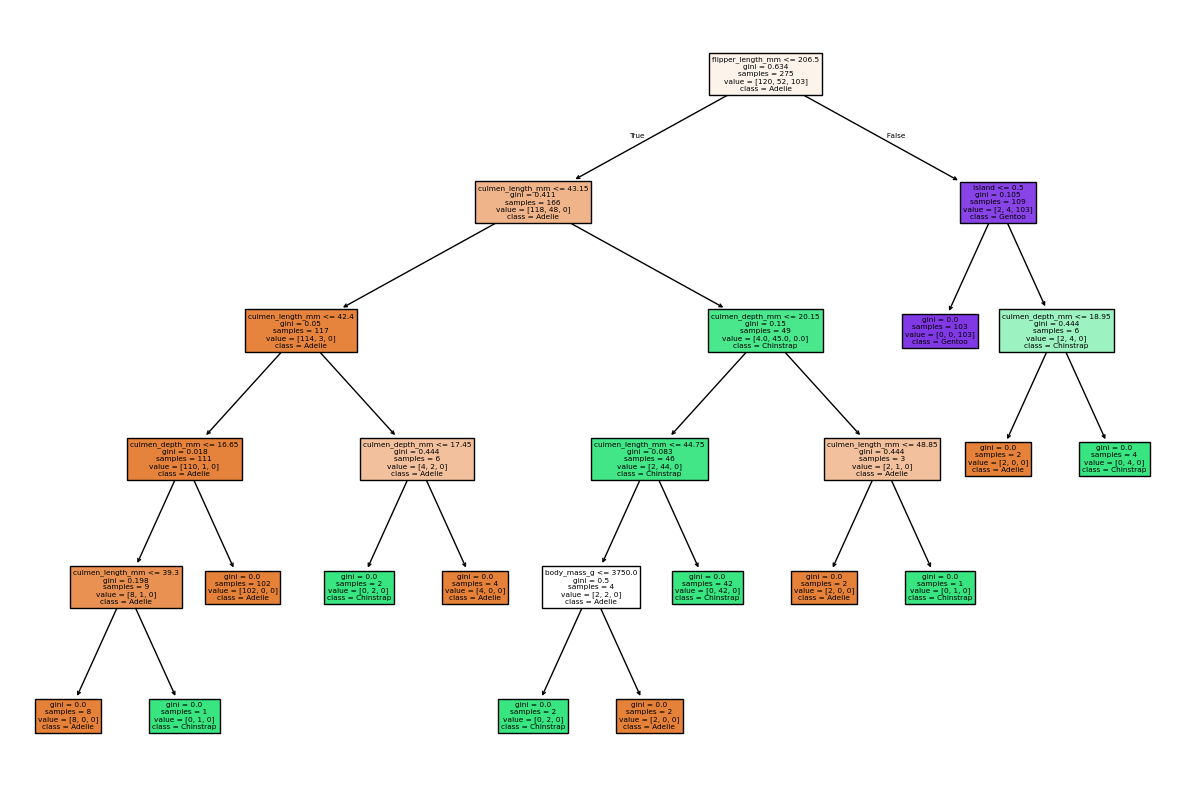

In [40]:
#e
plt.figure(figsize=(15, 10))
tree.plot_tree(model_gini, filled=True, feature_names=X.columns, class_names=['Adelie', 'Chinstrap', 'Gentoo'])
plt.show()

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [54]:
#f
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
cm_gini = confusion_matrix(y_test, y_pred_gini)

print("Confusion Matrix - Entropy:")
print(cm_entropy)
print("\nConfusion Matrix - Gini:")
print(cm_gini)

Confusion Matrix - Entropy:
[[31  1  0]
 [ 0 16  0]
 [ 0  1 20]]

Confusion Matrix - Gini:
[[31  1  0]
 [ 0 16  0]
 [ 0  1 20]]


In [55]:
#g
cr_entropy = classification_report(y_test, y_pred_entropy)
cr_gini = classification_report(y_test, y_pred_gini)

print("Classification Report - Entropy:")
print(cr_entropy)
print("\nClassification Report - Gini:")
print(cr_gini)

Classification Report - Entropy:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.89      1.00      0.94        16
           2       1.00      0.95      0.98        21

    accuracy                           0.97        69
   macro avg       0.96      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69


Classification Report - Gini:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.89      1.00      0.94        16
           2       1.00      0.95      0.98        21

    accuracy                           0.97        69
   macro avg       0.96      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69



In [49]:
#h
#The code snippets demonstrate how to implement decision trees with different splitting criteria (entropy and Gini index),
#train them on a dataset, make predictions, and evaluate their performance using metrics like accuracy, confusion matrix, and classification report.
#The visualizations of the decision trees and the output of the evaluation metrics provide insights into the decision-making
#process of the models and their effectiveness in classifying the data.


## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [57]:
#a
import pandas as pds
from sklearn.naive_bayes import GaussianNB

X_train_dropped = pds.DataFrame(X_train).dropna()
y_train_dropped = y_train[X_train_dropped.index]

model_nb = GaussianNB()
model_nb.fit(X_train_dropped, y_train_dropped)


GaussianNB()

In [58]:
#b
X_test_dropped = pds.DataFrame(X_test).dropna()

y_pred_nb = model_nb.predict(X_test_dropped)


In [61]:
#c
accuracy_score = accuracy_score(y_test.loc[X_test_dropped.index], y_pred_nb)
print(f"Accuracy Score: {accuracy_score}")


#d
confusion_matrix = confusion_matrix(y_test.loc[X_test_dropped.index], y_pred_nb)
print("Confusion Matrix:")
print(confusion_matrix)

Accuracy Score: 0.9705882352941176
Confusion Matrix:
[[30  1  0]
 [ 1 15  0]
 [ 0  0 21]]


In [62]:
#e
classification_report = classification_report(y_test.loc[X_test_dropped.index], y_pred_nb)
print("Classification Report:")
print(classification_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.94      0.94      0.94        16
           2       1.00      1.00      1.00        21

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0.97      0.97      0.97        68



In [ ]:
#f
#The accuracy score is a measure of the overall correctness of the model's predictions, while the confusion matrix provides a detailed breakdown of the model's performance for each class.
#The classification report offers a more comprehensive evaluation, including metrics such as precision, recall, F1-score, and support for each class.
#These metrics help to assess the model's ability to correctly identify positive and negative instances, as well as its overall accuracy in classifying the data.

Good Luck :)